# Brain Tumor Classification

In this notebook, I will fit the models for Brain Tumor classification. I have three different tumors Glioma, Meningioma, and Pituitary. They all have the same number of images for training. My No Tumor class is almost half the size of any tumor class. My baseline for this classification is 30%.
[Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8666750/) showed that just from MRI Brain Tumor Diagnosis was accurate around 75% of the time and the misclassification was different for different types of tumor. The most challenging to diagnose right from MRI were Meningiomas.
I will build a CNN model and use pre-trained models - EfficientNetV2S, Xception, and Resnet50.

In [1]:
# Imports
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetV2S, Xception, resnet50
from keras.optimizers import Adam

import functions

import numpy as np
np.random.seed(18)

In [2]:
# The path to the training set
bt_path_train = '../data/brain_tumor/train'
bt_path_test = '../data/brain_tumor/test'

# Set image size
image_size = 240

# Set Early stopping
es = EarlyStopping(patience = 5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

## CNN model

In [4]:
# Sets for models using TensorFlow
bt_train_ds, bt_val_ds = image_dataset_from_directory(
    bt_path_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale', # The images are black and wight
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.1,
    subset = 'both'
)

Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Using 287 files for validation.


In [5]:
# Load test data
bt_test_ds = image_dataset_from_directory(
    bt_path_test,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale', # The images are black and wight
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18
)

Found 394 files belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(64, (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#Second Convolution
model.add(Conv2D(64, (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#Third Convolution
model.add(Conv2D(128, (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#Fourth Convolution
model.add(Conv2D(256, (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#Fifth Convolution
model.add(Conv2D(512, (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.0005))) 
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.0005)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_ds, validation_data = bt_val_ds, epochs=30, callbacks=[reduce_lr])

Epoch 1/30
41/41 [==============================] - 111s 3s/step - loss: 1.2931 - accuracy: 0.5052 - val_loss: 0.8510 - val_accuracy: 0.6899 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 106s 3s/step - loss: 0.9107 - accuracy: 0.6585 - val_loss: 0.7202 - val_accuracy: 0.7909 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 143s 3s/step - loss: 0.7272 - accuracy: 0.7472 - val_loss: 0.6810 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 141s 3s/step - loss: 0.6247 - accuracy: 0.7995 - val_loss: 0.5478 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 144s 3s/step - loss: 0.5417 - accuracy: 0.8362 - val_loss: 0.4547 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 150s 4s/step - loss: 0.4828 - accuracy: 0.8657 - val_loss: 0.4819 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 142s 3s/step - loss: 0.4

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 240, 240, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 239, 239, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 118, 118, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 128)       3

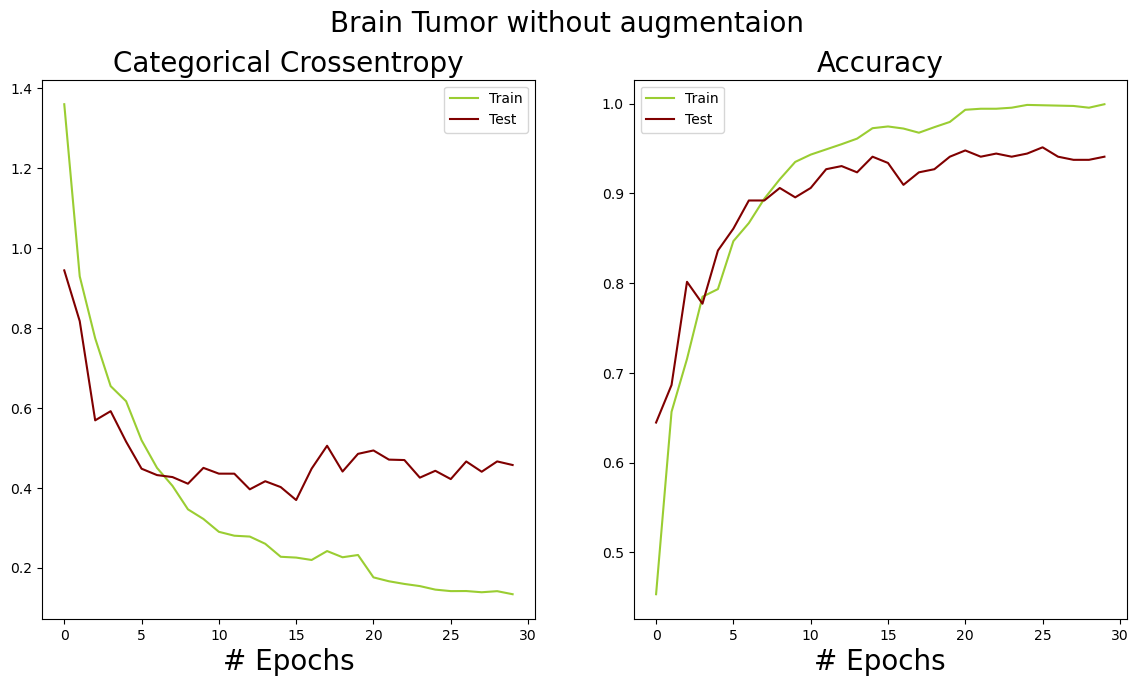

In [ ]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Brain Tumor without augmentaion')

Accuracy_score: 0.9408 



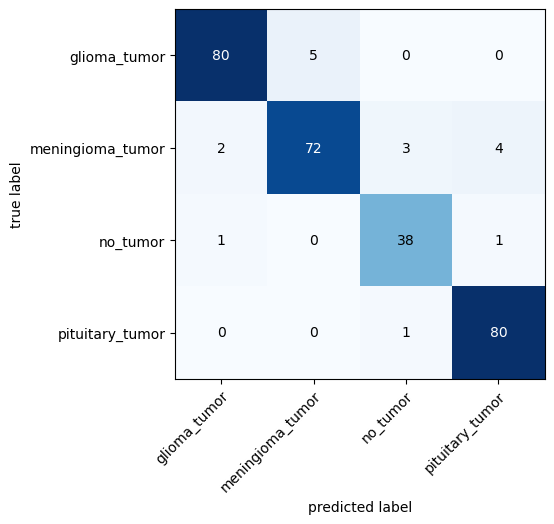

In [ ]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_val_ds)

Accuracy_score: 0.7462 



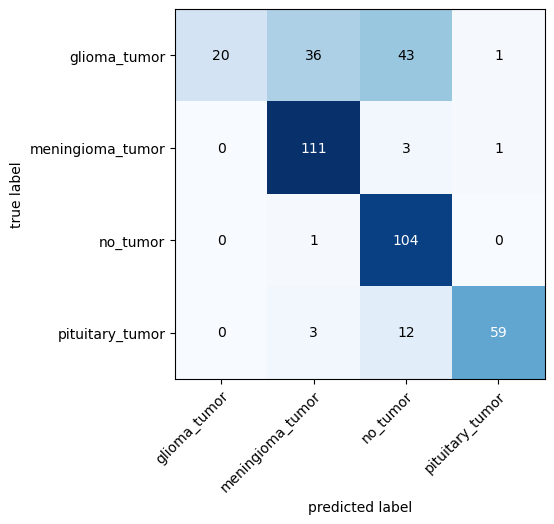

In [ ]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_test_ds)

My moder is overfit. On test data it performs worse on test data. The model struggles to predict Glioma tumor the most. I have tried different Dropouts, learning rate and regularizations and this is my best model. I will try pre-trained model to improve the accuracy.

---

# Pre-trained models

Pre-trained models requare color images I will have to read the images separately and convert each to RGB. Inspired by https://stackoverflow.com/questions/51995977/how-can-i-use-a-pre-trained-neural-network-with-grayscale-images

In [27]:
# Read the images, convert to greyscale and prepare for Tensorflow models 
X_train, X_val, y_train, y_val = functions.read_grey_images_to_rgb(bt_path_train)

# Check the shape of the data
X_train.shape, y_train.shape

((2152, 240, 240, 3), (2152, 4))

In [28]:
# Prepare the training data for predictions
X_test, y_test = functions.read_grey_images_to_rgb(bt_path_test, train_test = False)

# Check the shape of the data
X_test.shape, y_test.shape

((1279, 240, 240, 3), (1279, 4))

Another option for greyscale images is to read them as RGB

In [13]:
# Sets for models using TensorFlow
bt_train_ds_rgb, bt_val_ds_rgb = image_dataset_from_directory(
    bt_path_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.1,
    subset = 'both'
)

Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Using 287 files for validation.


In [21]:
# Load test data
bt_test_ds_rgb = image_dataset_from_directory(
    bt_path_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18
)

Found 394 files belonging to 4 classes.


---

## EfficientNetV2S

In [15]:
effnet = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [16]:
# Freeze last 5 layers
for layer in effnet.layers[:-5]:
    layer.trainable = False

In [19]:
# Read images as RGB to use in pre-trained model - my best model for this notebook

model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.2))

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(bt_train_ds_rgb, validation_data = bt_val_ds_rgb, epochs=30, callbacks=[es, reduce_lr])

Epoch 1/30
41/41 [==============================] - 244s 5s/step - loss: 0.6290 - accuracy: 0.7499 - val_loss: 0.3480 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 167s 4s/step - loss: 0.3749 - accuracy: 0.8579 - val_loss: 0.3150 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 169s 4s/step - loss: 0.2928 - accuracy: 0.8877 - val_loss: 0.2697 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 151s 4s/step - loss: 0.2427 - accuracy: 0.9172 - val_loss: 0.2520 - val_accuracy: 0.9059 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 110s 3s/step - loss: 0.2296 - accuracy: 0.9175 - val_loss: 0.2657 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 112s 3s/step - loss: 0.1968 - accuracy: 0.9334 - val_loss: 0.2107 - val_accuracy: 0.9199 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 113s 3s/step - loss: 0.1

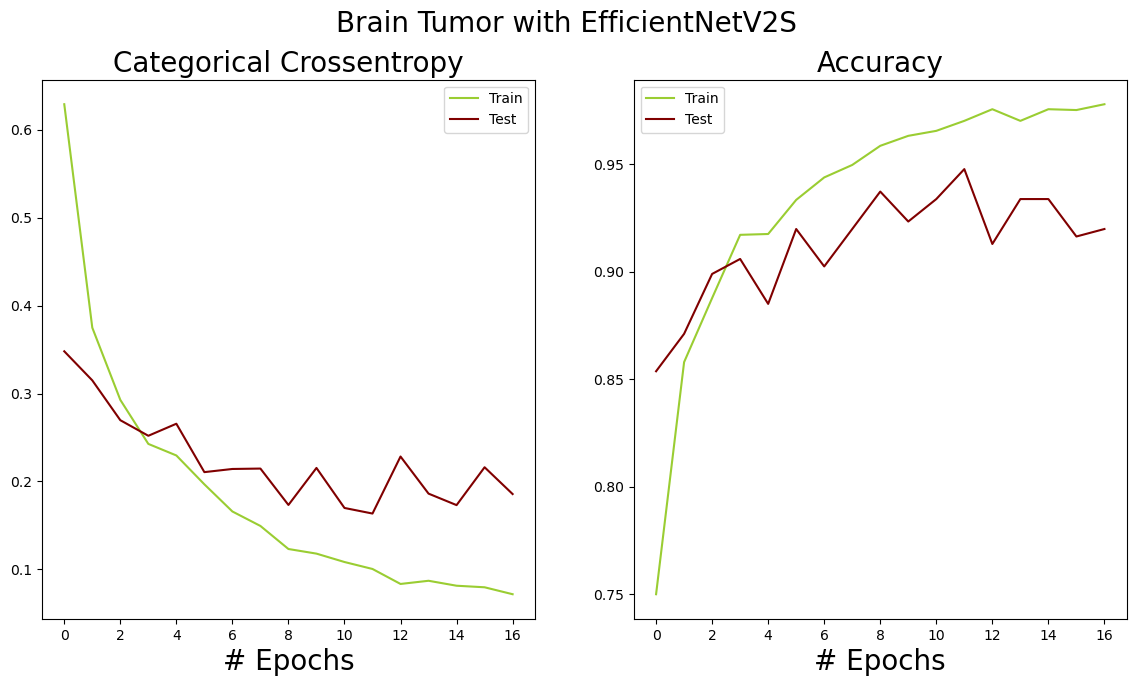

In [23]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_efv2s, 'Brain Tumor with EfficientNetV2S')

Accuracy_score: 0.9477 



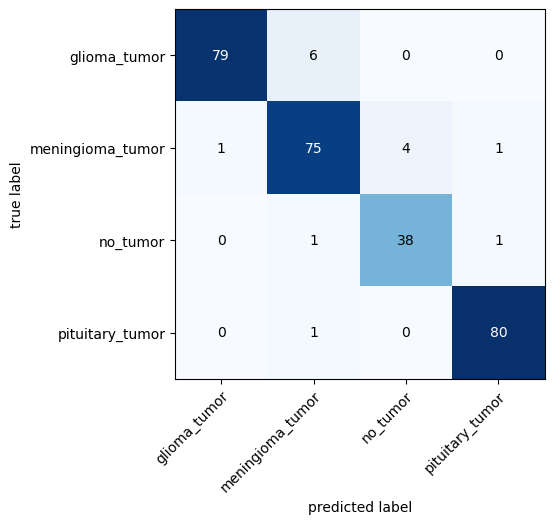

In [26]:
# Validating set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_val_ds_rgb)

Accuracy_score: 0.802 



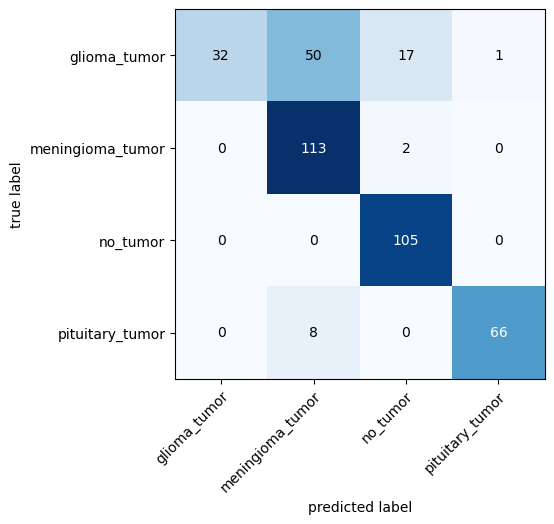

In [22]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_test_ds_rgb)

This model performs better than my best CNN, it still struggles to predict Glioma, but has fewer misclassifications. 

In [8]:
# Read images and convert each to RGB

model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.2))

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 137s 2s/step - loss: 0.6091 - accuracy: 0.7574 - val_loss: 0.3779 - val_accuracy: 0.8565
Epoch 2/50
68/68 [==============================] - 121s 2s/step - loss: 0.3903 - accuracy: 0.8569 - val_loss: 0.3317 - val_accuracy: 0.8719
Epoch 3/50
68/68 [==============================] - 123s 2s/step - loss: 0.3107 - accuracy: 0.8936 - val_loss: 0.2927 - val_accuracy: 0.8942
Epoch 4/50
68/68 [==============================] - 118s 2s/step - loss: 0.2333 - accuracy: 0.9178 - val_loss: 0.2737 - val_accuracy: 0.9011
Epoch 5/50
68/68 [==============================] - 171s 3s/step - loss: 0.2201 - accuracy: 0.9201 - val_loss: 0.2588 - val_accuracy: 0.8955
Epoch 6/50
68/68 [==============================] - 188s 3s/step - loss: 0.1928 - accuracy: 0.9322 - val_loss: 0.2461 - val_accuracy: 0.9192
Epoch 7/50
68/68 [==============================] - 190s 3s/step - loss: 0.1718 - accuracy: 0.9349 - val_loss: 0.2318 - val_accuracy: 0.9192
Epoch 8/50
68

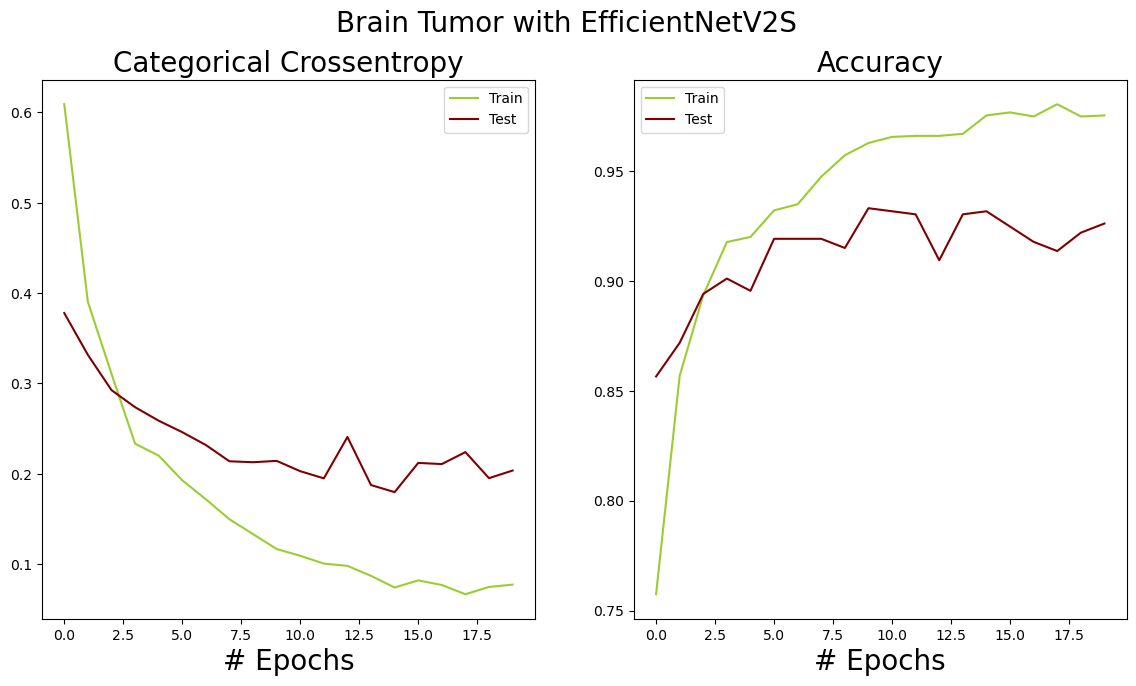

In [11]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_efv2s, 'Brain Tumor with EfficientNetV2S')

Accuracy_score: 0.9262 



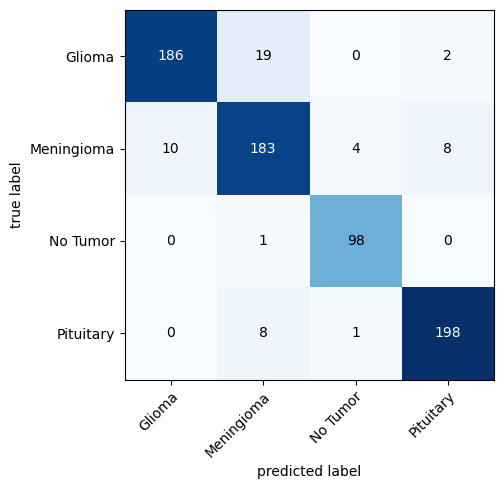

In [18]:
# Validating set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_val, y=y_val, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

Accuracy_score: 0.5004 



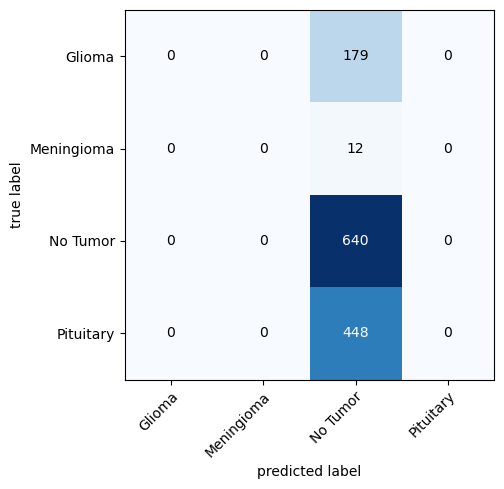

In [20]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

The model did not learn anything, it predicted No Tumor for all the data.

## Xception

In [27]:
from tensorflow.keras.applications import Xception

In [28]:
xception_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [29]:
# Freeze last 5 layers
for layer in xception_model.layers[:-5]:
    layer.trainable = False

In [30]:
# Read images as RGB to use in pre-trained model

model = Sequential()

model.add(xception_model)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_xc = model.fit(bt_train_ds_rgb, validation_data = bt_val_ds_rgb, epochs=30, callbacks=[es, reduce_lr])

Epoch 1/30
41/41 [==============================] - 111s 3s/step - loss: 0.7611 - accuracy: 0.6930 - val_loss: 4.2459 - val_accuracy: 0.3693 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 112s 3s/step - loss: 0.4453 - accuracy: 0.8320 - val_loss: 1.0663 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 113s 3s/step - loss: 0.3452 - accuracy: 0.8711 - val_loss: 0.7879 - val_accuracy: 0.7491 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 145s 4s/step - loss: 0.2503 - accuracy: 0.9125 - val_loss: 0.4225 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 177s 4s/step - loss: 0.1906 - accuracy: 0.9365 - val_loss: 0.3862 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 171s 4s/step - loss: 0.1583 - accuracy: 0.9501 - val_loss: 0.3253 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 172s 4s/step - loss: 0.1

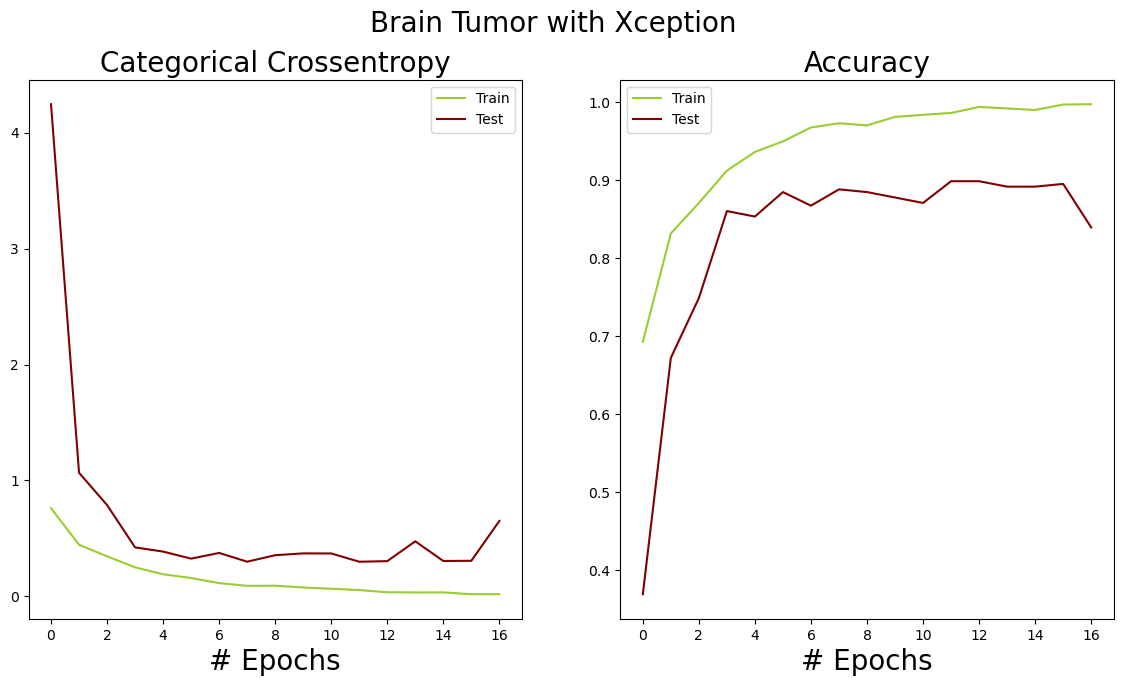

In [31]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_xc, 'Brain Tumor with Xception')

Accuracy_score: 0.899 



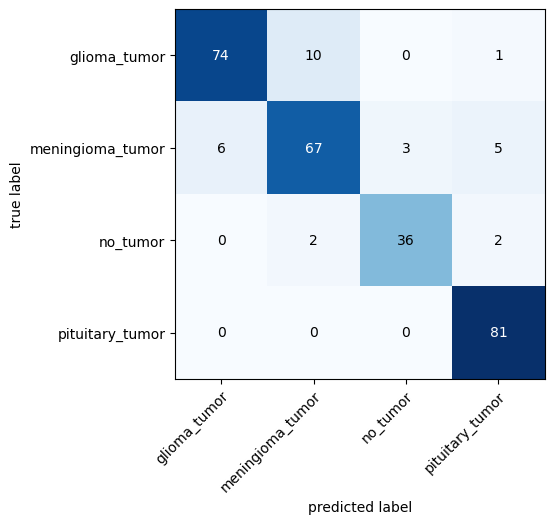

In [32]:
# Validating set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_val_ds_rgb)

Accuracy_score: 0.7411 



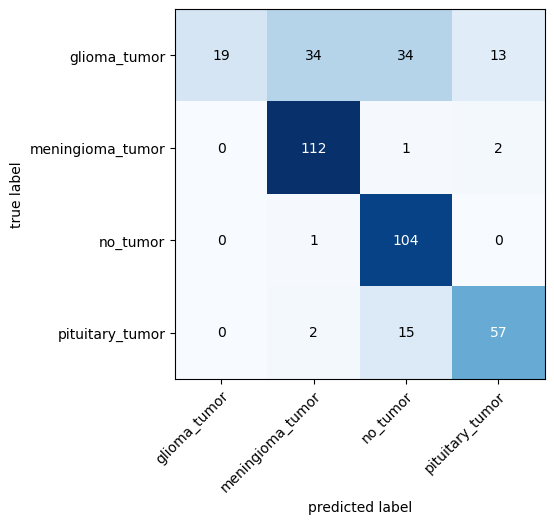

In [33]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_test_ds_rgb)

This model has lower accuracy than EfficientNetV2S.

In [24]:
# Read images and convert each to RGB

model = Sequential()

model.add(xception_model)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_xc = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 218s 3s/step - loss: 0.7264 - accuracy: 0.7040 - val_loss: 2.8805 - val_accuracy: 0.4777
Epoch 2/50
68/68 [==============================] - 202s 3s/step - loss: 0.4355 - accuracy: 0.8341 - val_loss: 0.7087 - val_accuracy: 0.7451
Epoch 3/50
68/68 [==============================] - 202s 3s/step - loss: 0.3463 - accuracy: 0.8704 - val_loss: 0.4382 - val_accuracy: 0.8357
Epoch 4/50
68/68 [==============================] - 203s 3s/step - loss: 0.2785 - accuracy: 0.8908 - val_loss: 0.3921 - val_accuracy: 0.8621
Epoch 5/50
68/68 [==============================] - 200s 3s/step - loss: 0.2273 - accuracy: 0.9252 - val_loss: 0.3574 - val_accuracy: 0.8649
Epoch 6/50
68/68 [==============================] - 202s 3s/step - loss: 0.1786 - accuracy: 0.9401 - val_loss: 0.3867 - val_accuracy: 0.8719
Epoch 7/50
68/68 [==============================] - 177s 3s/step - loss: 0.1592 - accuracy: 0.9433 - val_loss: 0.3649 - val_accuracy: 0.8705
Epoch 8/50
68

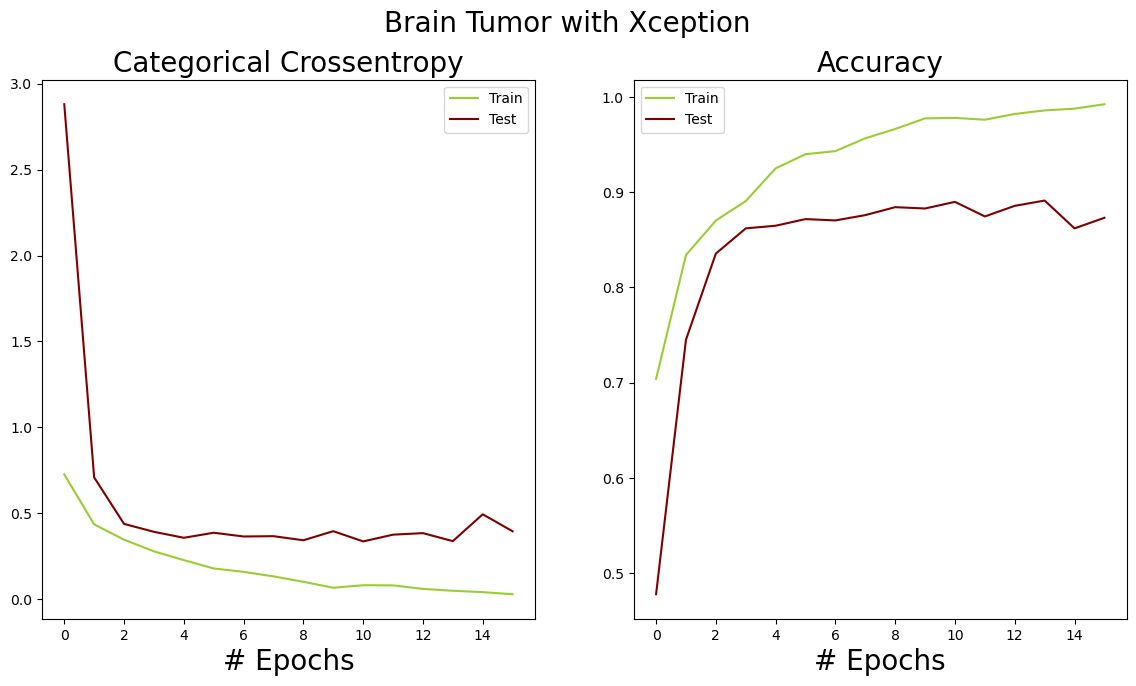

In [25]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_xc, 'Brain Tumor with Xception')

Accuracy_score: 0.8733 



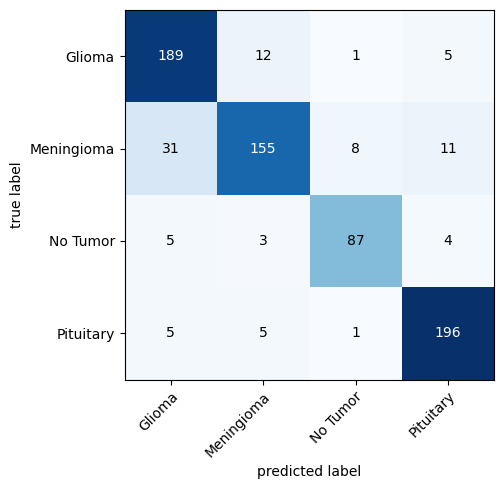

In [26]:
# Validating set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

Accuracy_score: 0.4386 



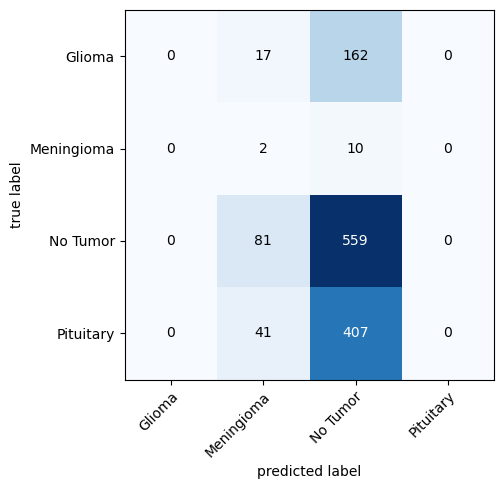

In [27]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

This model accuracy is the lowest, it tried to predict other clases, except no Tumor, but did not perform well.

## ResNet50

In [34]:
from tensorflow.keras.applications import resnet50

rn_model = resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [35]:
# Freeze last 5 layers
for layer in rn_model.layers:
    layer.trainable = False

In [36]:
# Read images as RGB to use in pre-trained model

model = Sequential()

model.add(rn_model)
model.add(Flatten())
model.add(Dropout(.2))
#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(bt_train_ds_rgb, validation_data = bt_val_ds_rgb, epochs=30, callbacks=[es, reduce_lr])

Epoch 1/30
41/41 [==============================] - 150s 3s/step - loss: 6.7078 - accuracy: 0.7383 - val_loss: 2.4864 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 140s 3s/step - loss: 0.7113 - accuracy: 0.9439 - val_loss: 0.8016 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 141s 3s/step - loss: 0.2830 - accuracy: 0.9659 - val_loss: 0.9011 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 142s 3s/step - loss: 0.1569 - accuracy: 0.9795 - val_loss: 0.9568 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 143s 3s/step - loss: 0.1084 - accuracy: 0.9810 - val_loss: 0.9991 - val_accuracy: 0.9303 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 140s 3s/step - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.5409 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 142s 3s/step - loss: 0.0

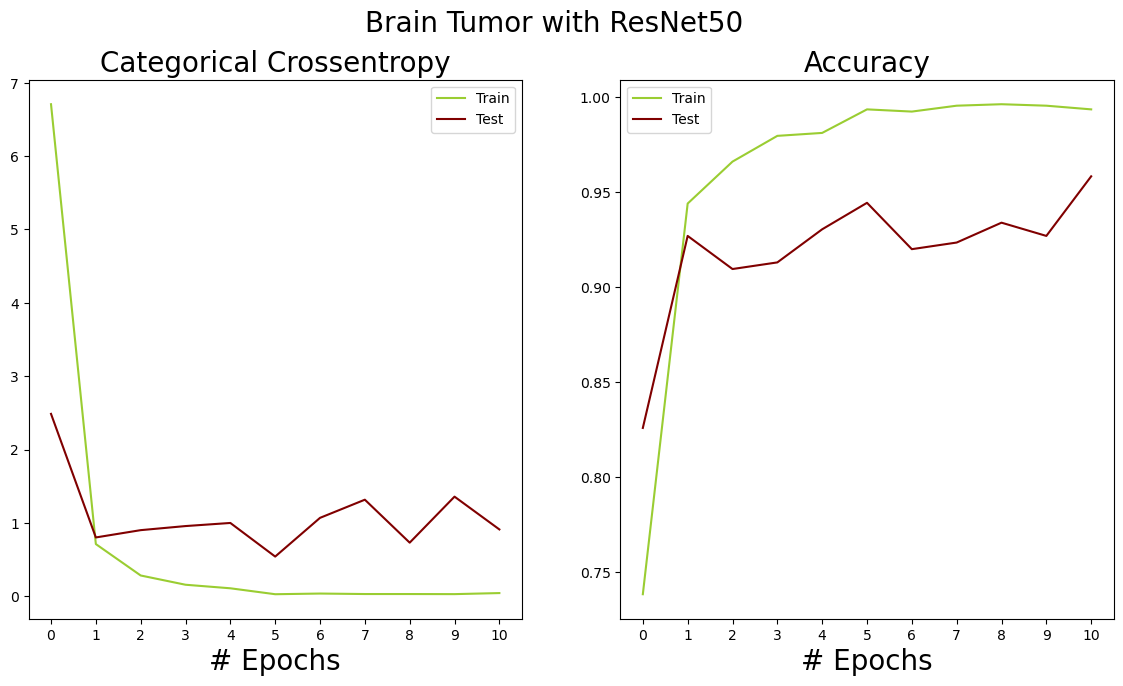

In [37]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_rn, 'Brain Tumor with ResNet50')

Accuracy_score: 0.9443 



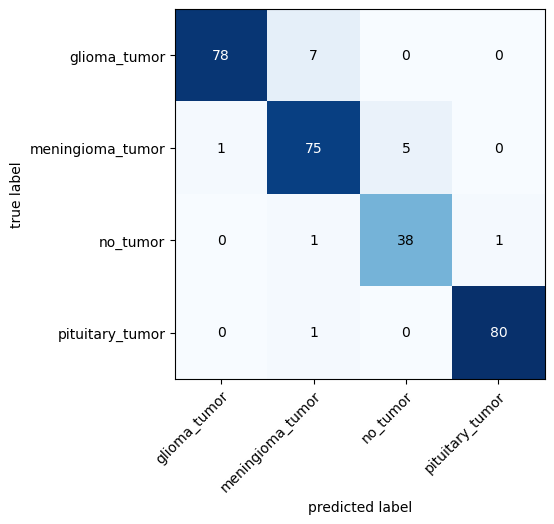

In [38]:
# Validating set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_val_ds_rgb)

Accuracy_score: 0.7665 



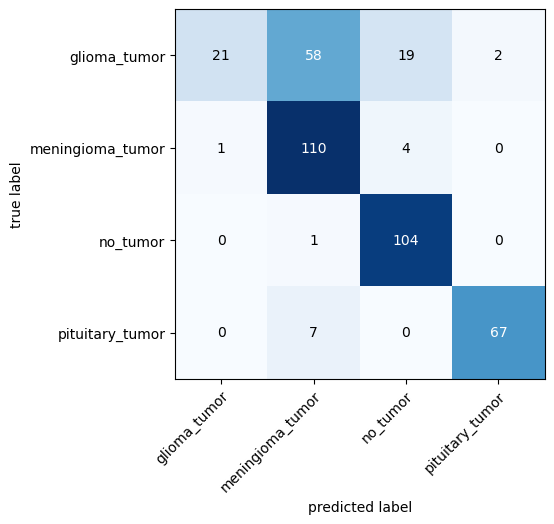

In [39]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, val_data=bt_test_ds_rgb)

This model has lower accuracy than EfficientNetV2S.

In [31]:
# Read images and convert each to RGB

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 413s 6s/step - loss: 5.7764 - accuracy: 0.7783 - val_loss: 2.0234 - val_accuracy: 0.8969
Epoch 2/50
68/68 [==============================] - 382s 6s/step - loss: 0.6966 - accuracy: 0.9498 - val_loss: 2.8425 - val_accuracy: 0.8593
Epoch 3/50
68/68 [==============================] - 384s 6s/step - loss: 0.3756 - accuracy: 0.9665 - val_loss: 1.7362 - val_accuracy: 0.9109
Epoch 4/50
68/68 [==============================] - 386s 6s/step - loss: 0.1774 - accuracy: 0.9823 - val_loss: 2.1127 - val_accuracy: 0.9011
Epoch 5/50
68/68 [==============================] - 382s 6s/step - loss: 0.0781 - accuracy: 0.9884 - val_loss: 1.4490 - val_accuracy: 0.9220
Epoch 6/50
68/68 [==============================] - 384s 6s/step - loss: 0.1756 - accuracy: 0.9837 - val_loss: 2.0132 - val_accuracy: 0.9304
Epoch 7/50
68/68 [==============================] - 382s 6s/step - loss: 0.1293 - accuracy: 0.9870 - val_loss: 5.1696 - val_accuracy: 0.8106
Epoch 8/50
68

Accuracy_score: 0.5004 



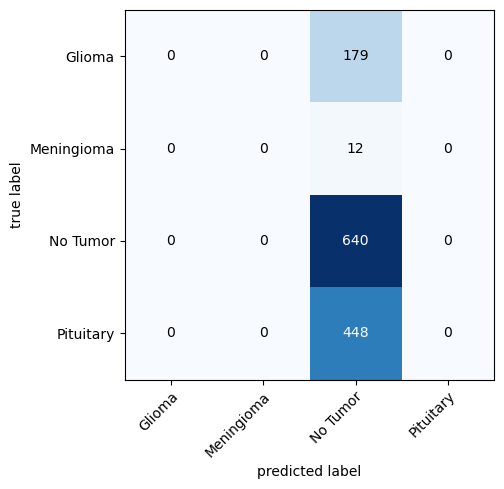

In [32]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

---

My best model so far is EfficientNetV2S with greyscale images read as RGB. The accuracy is 80% on the test set. It is still overfit and struggles with Glioma the most. As with Alzheimer's images, all pretrained models performed better with greyscale images read as RGB compare to transformed from Greyscale to RGB. In the next notebook I will use Augmentation to improve the model.